<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<i>Lobatto, Elias - Zerpa, Nadia - Quintana, Fabio</i><br>

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Trabajo Práctico N°1</strong></p> 


In [1]:
import pandas as pd
# Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import numpy as np

np.set_printoptions(suppress = True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.24.3


In [3]:
# En produccion eliminar, se incluye por informacion
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Matplotlib version: 3.6.0


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


LECTURA DEL ARCHIVO:

In [6]:
df = pd.read_excel('./Datos.xls')  
print(df.head())

  TPo1 TPo2 TPo3 TPo4  Final  Quat
0   10    A    A    A      A  1Q23
1    A    A    A    A      A  1Q23
2   10   10    8   10  6.633  1Q23
3    8    A    A    A      A  1Q23
4    4    6    9    8      A  1Q23


In [7]:
df.sample(5) 

,TPo1,TPo2,TPo3,TPo4,Final,Quat
300,A,A,A,A,A,2Q22
460,A,A,A,A,A,1Q22
201,8,A,A,A,2,1Q23
12,10,10,A,A,A,1Q23
456,A,9,7,10,2,1Q22


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TPo1    576 non-null    object
 1   TPo2    576 non-null    object
 2   TPo3    571 non-null    object
 3   TPo4    569 non-null    object
 4   Final   576 non-null    object
 5   Quat    576 non-null    object
dtypes: object(6)
memory usage: 27.1+ KB


LIMPIEZA DE DATOS:

In [9]:
df['Final'].unique()

array(['A', 6.633147564581388, 6.915162037037037, 5.6375, 6,
       8.058333333333334, 2, 5.0398692810457515, 5.823611111111111,
       7.239460784313725, 7.674999999999999, 6.529166666666667,
       4.1499999999999995, 6.810128773731715, 7.637472766884532,
       6.1499999999999995, 6.0625, 6.815128968253968, 6.730621693121693,
       6.999257897603487, 7, 7.698958333333334, 7.375, 6.708660130718954,
       5.908862433862434, 5.142276007625273, 4.54047619047619,
       4.543229166666666, 6.35, 7.976365059912854, 5.8500000000000005,
       7.0447673513849995, 8.995833333333334, 5.183533691254279,
       7.802233115468409, 7.8500000000000005, 4.342708333333333,
       6.640277777777778, 7.919527116402116, 5.751388888888889, 4.8375,
       4.827662037037037, 6.901851851851853, 4.664089246809835,
       5.570039682539683, 7.490439231248055, 4.013029100529101,
       6.304166666666666, 4.188095238095238, 5.65, 7.574999999999999,
       8.604411764705882, 5.072425984282602, 3.96250000000000

In [10]:
# Se quitan los ausentes en instancia final
df.drop(df[(df['Final'] == 'A') & (df['TPo1'] == 'A') & (df['TPo2'] == 'A') & (df['TPo3'] == 'A') & (df['TPo4'] == 'A')].index, inplace=True)

In [11]:
# Se transforman en 0 los valores A (ausentes) y en formato entero
# Como hay valores nulos primero se los llena con cero
df.loc[df['TPo1'] == 'A', "TPo1"] = '0'
df[['TPo1']] = df[['TPo1']].astype(int)

df.loc[df['TPo2'] == 'A', "TPo2"] = '0'
df[['TPo2']] = df[['TPo2']].astype(int)

df.loc[df['TPo3'] == 'A', "TPo3"] = '0'
df.loc[df['TPo3'] == '', "TPo3"] = '0'
df['TPo3'] = df['TPo3'].fillna(0)


df[['TPo3']] = df[['TPo3']].astype(int)

df.loc[df['TPo4'] == 'A', "TPo4"] = '0'
df.loc[df['TPo4'] == '', "TPo4"] = '0'
df['TPo4'] = df['TPo4'].fillna(0)               
df[['TPo4']] = df[['TPo4']].astype(int)

df.loc[df['Final'] == 'A', "Final"] = '0'
df.loc[df['Final'] == '', "Final"] = '0'
df['Final'] = df['Final'].fillna(0)              
df[['Final']] = df[['Final']].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPo1    459 non-null    int32  
 1   TPo2    459 non-null    int32  
 2   TPo3    459 non-null    int32  
 3   TPo4    459 non-null    int32  
 4   Final   459 non-null    float64
 5   Quat    459 non-null    object 
dtypes: float64(1), int32(4), object(1)
memory usage: 17.9+ KB


In [13]:
# CREO LA COLUMNA DE CANTIDAD DE TP AUSENTES (O NO ENTREGADOS.)
# La inicializo en 4, y voy decrementando si encuentro un 0
df["TPEntregados"] = 4

In [14]:
# Decremento siempre que encuentro un 0
df.loc[df['TPo1'] == 0, 'TPEntregados'] -= 1
df.loc[df['TPo2'] == 0, 'TPEntregados'] -= 1
df.loc[df['TPo3'] == 0, 'TPEntregados'] -= 1
df.loc[df['TPo4'] == 0, 'TPEntregados'] -= 1

In [15]:
# CREO OTRA COLUMNA CON LOS PROMEDIOS
df["PromedioTPs"] = 0

In [16]:
df["PromedioTPs"] = (df['TPo1'] + df['TPo2'] + df['TPo3'] + df['TPo4']) / 4

In [17]:
# Agrego la columnas con las distintas condiciones finales
df["Promociona"] = 0
df["Aprueba"] = 0
df["Reprobado"] = 0
df["Ausente"] = 0
df.loc[df['Final'] > 6.5, "Promociona"] = 1
df.loc[(df['Final'] >= 4) & (df['Final'] <= 6.5), "Aprueba"] = 1
df.loc[(df['Final'] < 4) & (df['Final'] > 0) , "Reprobado"] = 1
df.loc[df['Final'] == 0, "Ausente"] = 1

In [18]:
df.sample(5) 

,TPo1,TPo2,TPo3,TPo4,Final,Quat,TPEntregados,PromedioTPs,Promociona,Aprueba,Reprobado,Ausente
3,8,0,0,0,0.000,1Q23,1,2.0,0,0,0,1
185,10,10,0,0,0.000,1Q23,2,5.0,0,0,0,1
421,8,0,0,0,0.000,1Q22,1,2.0,0,0,0,1
47,8,8,0,0,0.000,1Q23,2,4.0,0,0,0,1
488,10,10,10,0,4.846,1Q22,3,7.5,0,1,0,0


In [19]:
# Informacion del modelo
df.describe()

,TPo1,TPo2,TPo3,TPo4,Final,TPEntregados,PromedioTPs,Promociona,Aprueba,Reprobado,Ausente
count,459.000,459.000,459.000,459.000,459.000,459.000,459.000,459.000,459.000,459.000,459.000
mean,7.185,5.044,4.817,4.065,2.657,2.386,5.278,0.187,0.179,0.170,0.464
std,4.012,4.534,4.525,4.666,2.961,1.316,3.103,0.391,0.383,0.376,0.499
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,6.000,0.000,0.000,0.000,0.000,1.000,2.500,0.000,0.000,0.000,0.000
50%,10.000,6.000,6.000,0.000,2.000,2.000,5.000,0.000,0.000,0.000,0.000
75%,10.000,10.000,10.000,10.000,5.386,4.000,7.500,0.000,0.000,0.000,1.000
max,10.000,10.000,10.000,10.000,10.000,4.000,10.000,1.000,1.000,1.000,1.000


In [20]:
#QUITA COLUMNAS NO DESEADAS
#columns = ['Rank']
#df.drop(columns, inplace=True, axis=1)

In [21]:
# Armo un dataframe sólo con los que promocionaron.
dfPromo = df.drop(['Final', 'Aprueba', 'Reprobado', 'Ausente'], axis = 1)
dfPromo.sample(5)

,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona
126,10,10,9,4,1Q23,4,8.25,0
426,10,0,10,10,1Q22,3,7.50,0
264,0,0,0,0,2Q22,0,0.00,0
369,10,0,0,0,1Q22,1,2.50,0
245,0,0,0,0,2Q22,0,0.00,1


PANDAS PROFILING:

In [22]:
import ydata_profiling as pp

In [23]:
pp.ProfileReport(dfPromo)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
data_train = dfPromo.sample(frac = 0.95, random_state = 786)

In [25]:
data_test = dfPromo.drop(data_train.index)

In [26]:
data_train.sample(5)

,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona
288,0,0,10,10,2Q22,2,5.0,0
69,10,10,10,10,1Q23,4,10.0,1
71,10,10,10,10,1Q23,4,10.0,0
250,0,0,0,0,2Q22,0,0.0,0
123,10,8,0,0,1Q23,2,4.5,0


In [27]:
data_train = data_train.reset_index(drop = True)

In [28]:
data_train.sample(5)

,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona
289,0,0,0,0,2Q22,0,0.0,1
230,10,10,10,0,1Q23,3,7.5,0
22,0,0,2,0,1Q22,1,0.5,0
86,10,8,10,10,1Q23,4,9.5,1
223,10,0,10,10,1Q22,3,7.5,1


In [29]:
data_test = data_test.reset_index(drop = True)

In [30]:
from pycaret.classification import *

In [31]:
expPromo_clf100 = setup(data = data_train, 
                       target = 'Promociona', 
                       session_id = 100,
                       log_experiment = True, 
                       experiment_name = 'expPromo_clf100')

,Description,Value
0,Session id,100
1,Target,Promociona
2,Target type,Binary
3,Original data shape,"(436, 8)"
4,Transformed data shape,"(436, 10)"
5,Transformed train set shape,"(305, 10)"
6,Transformed test set shape,"(131, 10)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [32]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [33]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8099,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0280
ridge,Ridge Classifier,0.8067,0.0000,0.0000,0.0000,0.0000,-0.0059,-0.0089,0.0250
lda,Linear Discriminant Analysis,0.8002,0.6567,0.0000,0.0000,0.0000,-0.0166,-0.0218,0.0270
lr,Logistic Regression,0.7970,0.6598,0.0000,0.0000,0.0000,-0.0207,-0.0250,0.9100
ada,Ada Boost Classifier,0.7937,0.7041,0.0500,0.1700,0.0718,0.0240,0.0323,0.0620
et,Extra Trees Classifier,0.7901,0.6892,0.1700,0.3833,0.2317,0.1328,0.1489,0.1000
gbc,Gradient Boosting Classifier,0.7838,0.7234,0.1333,0.2933,0.1768,0.0799,0.0875,0.0600
rf,Random Forest Classifier,0.7837,0.7112,0.1533,0.4167,0.2166,0.1141,0.1410,0.1110
xgboost,Extreme Gradient Boosting,0.7804,0.7228,0.2200,0.3729,0.2624,0.1485,0.1612,0.0500
lightgbm,Light Gradient Boosting Machine,0.7706,0.7098,0.1033,0.2500,0.1444,0.0399,0.0453,0.0980


In [34]:
gbc_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8065,0.7233,0.1667,0.5000,0.2500,0.1696,0.2037
1,0.7419,0.7200,0.0000,0.0000,0.0000,-0.1071,-0.1287
2,0.7742,0.6700,0.1667,0.3333,0.2222,0.1070,0.1158
3,0.7419,0.7100,0.0000,0.0000,0.0000,-0.1071,-0.1287
4,0.8065,0.7500,0.1667,0.5000,0.2500,0.1696,0.2037
5,0.7667,0.6440,0.0000,0.0000,0.0000,-0.1053,-0.1195
6,0.7667,0.6520,0.0000,0.0000,0.0000,-0.1053,-0.1195
7,0.8333,0.7882,0.5000,0.6000,0.5455,0.4444,0.4472
8,0.8000,0.6667,0.1667,0.5000,0.2500,0.1667,0.2004


HIPERPARAMETRIZACIÓN:

In [35]:
gbc_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
tuned_gbc_model = tune_model(gbc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8065,0.5800,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8065,0.7467,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8065,0.7233,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8065,0.6767,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8065,0.7767,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8333,0.6600,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8333,0.6920,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8000,0.7326,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8000,0.7361,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


GRÁFICOS GBC MODEL:

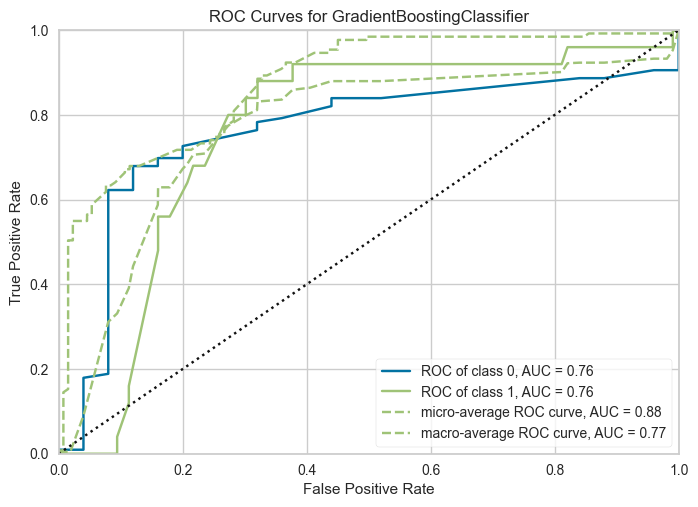

In [37]:
plot_model(gbc_model, plot = 'auc')

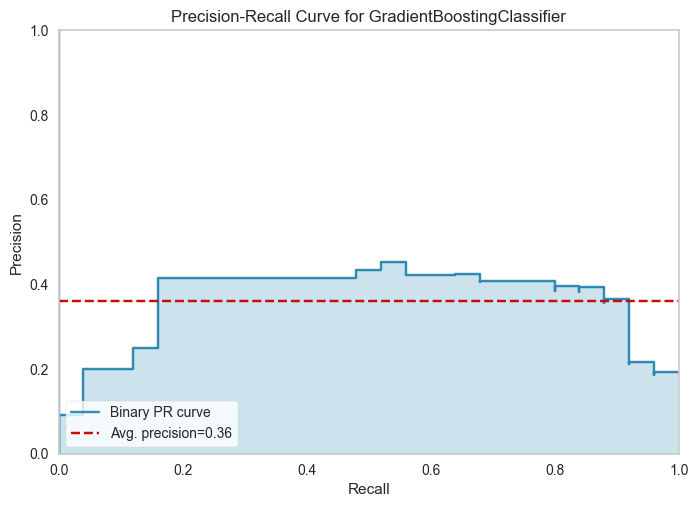

In [38]:
plot_model(gbc_model, plot = 'pr')

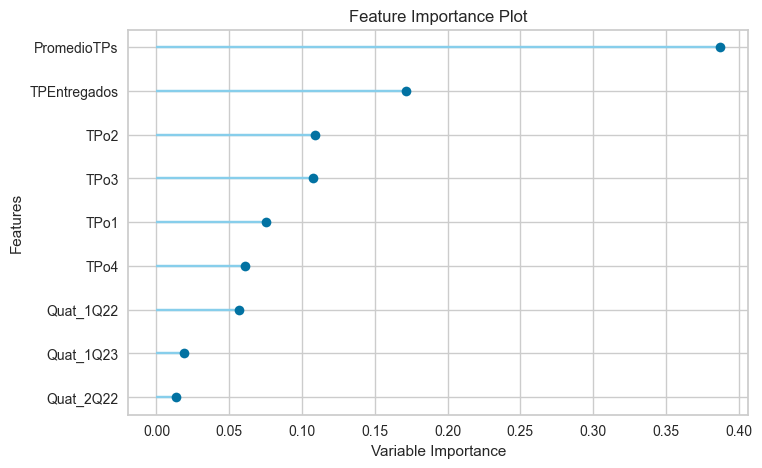

In [39]:
plot_model(gbc_model, plot = 'feature')

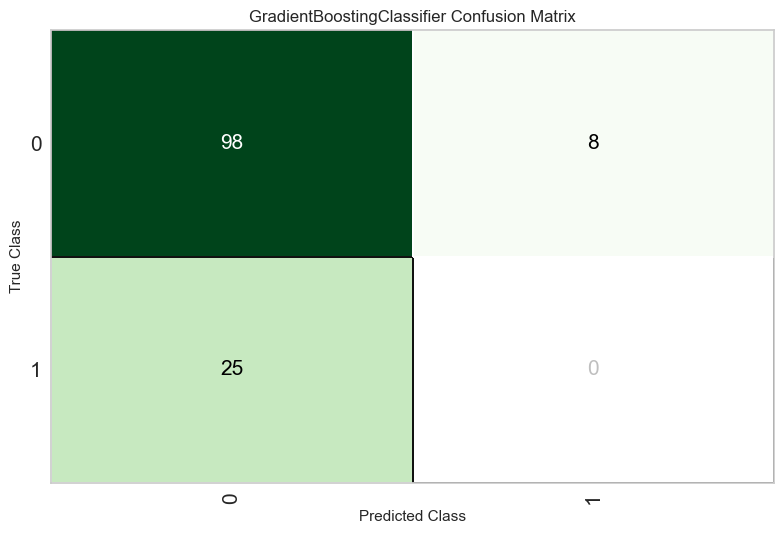

In [40]:
plot_model(gbc_model, plot = 'confusion_matrix')

In [41]:
evaluate_model(tuned_gbc_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

PREDICCIONES:

In [42]:
predict_model(gbc_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7481,0.7600,0.0000,0.0000,0.0000,-0.1020,-0.1239


,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona,prediction_label,prediction_score
161,8,1,0,0,1Q22,2,2.25,0,0,0.972
317,10,0,10,10,1Q22,3,7.50,0,0,0.558
13,10,10,10,10,1Q23,4,10.00,1,0,0.773
305,10,10,0,0,1Q23,2,5.00,0,0,0.994
225,10,10,0,0,1Q23,2,5.00,0,0,0.994
...,...,...,...,...,...,...,...,...,...,...
60,10,10,6,0,1Q22,3,6.50,0,0,0.958
212,0,10,10,10,1Q22,3,7.50,0,1,0.525
183,10,8,0,0,1Q23,2,4.50,0,0,0.988
55,10,0,0,0,1Q22,1,2.50,0,0,0.949


In [43]:
final_model = finalize_model(gbc_model)

In [44]:
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['TPo1', 'TPo2', 'TPo3', 'TPo4',
                                             'TPEntregados', 'PromedioTPs'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 Trans...
                                            criterion='friedman_mse', init=None,


In [45]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8473,0.9049,0.2400,0.8571,0.3750,0.3181,0.4029


,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona,prediction_label,prediction_score
161,8,1,0,0,1Q22,2,2.25,0,0,0.983
317,10,0,10,10,1Q22,3,7.50,0,0,0.523
13,10,10,10,10,1Q23,4,10.00,1,0,0.729
305,10,10,0,0,1Q23,2,5.00,0,0,0.987
225,10,10,0,0,1Q23,2,5.00,0,0,0.987
...,...,...,...,...,...,...,...,...,...,...
60,10,10,6,0,1Q22,3,6.50,0,0,0.959
212,0,10,10,10,1Q22,3,7.50,0,0,0.734
183,10,8,0,0,1Q23,2,4.50,0,0,0.988
55,10,0,0,0,1Q22,1,2.50,0,0,0.965


In [46]:
unseen_predictions = predict_model(final_model, data = data_test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8696,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona,prediction_label,prediction_score
0,8,0,0,0,1Q23,1,2.00,0,0,0.986
1,10,6,9,10,1Q23,4,8.75,0,0,0.937
2,6,9,10,10,1Q23,4,8.75,1,0,0.985
3,10,10,10,0,1Q23,3,7.50,0,0,0.880
4,10,10,10,10,1Q23,4,10.00,0,0,0.729


In [47]:
save_model(final_model,'./FinalGBCModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['TPo1', 'TPo2', 'TPo3', 'TPo4',
                                              'TPEntregados', 'PromedioTPs'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Trans...
                                             criterion='friedman_ms

**TPOT CLASSIFIER**

In [48]:
from tpot import TPOTClassifier   # Libreria de TPot para evalaucion de clasificadores.
from sklearn.model_selection import train_test_split # Metodo para dividir el conjunto de datos en entrenamiento y prueba.

In [49]:
# Borro la columna "Quat"
dfPromo = dfPromo.drop(['Quat'], axis = 1)
dfPromo.sample(5)

,TPo1,TPo2,TPo3,TPo4,TPEntregados,PromedioTPs,Promociona
467,0,10,10,10,3,7.5,0
526,10,8,8,8,4,8.5,0
192,10,10,0,0,2,5.0,0
86,10,10,0,0,2,5.0,0
525,10,10,0,0,2,5.0,0


In [50]:
# Sepado en train (75%) y test (25%), luego valido los conjuntos
x_train, x_test, y_train, y_test = train_test_split(dfPromo, dfPromo['Promociona'], train_size = 0.75, test_size = 0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((344, 7), (115, 7), (344,), (115,))

In [51]:
# Entrenamiento del modelo
tpot = TPOTClassifier(verbosity = 2, max_time_mins = 4)
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Generation 6 - Current best internal CV score: 1.0

4.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GaussianNB(input_matrix)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               log_file=None, max_eval_time_mins=5, max_time_mins=4,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [53]:
# Evaluacion del modelo
print(tpot.score(x_test, y_test))

1.0


In [54]:
# Exporto el código Phyton
tpot.export('tpot_dfPromo.py')

#### Código generado: ####

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 1.0
exported_pipeline = GaussianNB()

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

**FLAML**

In [125]:
from flaml import AutoML
from flaml.automl.data import load_openml_dataset

In [126]:
automl = AutoML()

automl_settings = {
    "time_budget": 30,        # seconds
    "metric": 'accuracy',
    "task": 'classification'
}

In [127]:
X_train, X_test, y_train, y_test = train_test_split(dfPromo, dfPromo['Promociona'], train_size=0.75, test_size=0.25)

In [128]:
automl.fit(X_train=X_train, y_train=y_train,**automl_settings)

[flaml.automl.logger: 11-28 18:31:32] {1679} INFO - task = classification
[flaml.automl.logger: 11-28 18:31:32] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 11-28 18:31:32] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 11-28 18:31:32] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 11-28 18:31:32] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-28 18:31:32] {2344} INFO - Estimated sufficient time budget=1298s. Estimated necessary time budget=30s.
[flaml.automl.logger: 11-28 18:31:32] {2391} INFO -  at 0.2s,	estimator lgbm's best error=0.1948,	best estimator lgbm's best error=0.1948
[flaml.automl.logger: 11-28 18:31:32] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-28 18:31:32] {2391} INFO -  at 0.3s,	estimator lgbm's best error=0.1948,	best estimator lgbm's best error=0.1948
[flaml.automl.logger: 11-28 18:31:

In [129]:
print(automl.predict_proba(X_train).shape)

(344, 2)


In [130]:
print(automl.model)

In [131]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.001348364934537134, 'reg_lambda': 1.4442580148221913}
Best accuracy on validation data: 1
Training duration of best run: 0.02014 s
